In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("github_trending_repos.csv")


In [8]:
df.head()

,owner,repo_name,full_name,description,language,stars,forks,stars_period,contributors_count,url,search_language,timeframe,scraped_at
0,sansan0,TrendRadar,sansan0/TrendRadar,🎯 告别信息过载，AI 助你看懂新闻资讯热点，简单的舆情监控分析 - 多平台热点聚合+基于 ...,Python,36604,19908,1067,0,https://github.com/sansan0/TrendRadar,overall,daily,34:14.5
1,google,adk-go,google/adk-go,"An open-source, code-first Go toolkit for buil...",Go,5920,396,118,0,https://github.com/google/adk-go,overall,daily,34:14.5
2,TapXWorld,ChinaTextbook,TapXWorld/ChinaTextbook,所有小初高、大学PDF教材。,Roff,60750,13494,226,0,https://github.com/TapXWorld/ChinaTextbook,overall,daily,34:14.5
3,yeongpin,cursor-free-vip,yeongpin/cursor-free-vip,[Support 0.49.x]（Reset Cursor AI MachineID & B...,Python,44916,5365,250,0,https://github.com/yeongpin/cursor-free-vip,overall,daily,34:14.5
4,nvm-sh,nvm,nvm-sh/nvm,Node Version Manager - POSIX-compliant bash sc...,Shell,90205,9641,67,0,https://github.com/nvm-sh/nvm,overall,daily,34:14.5


In [12]:
df.isnull().sum()

owner                  0
repo_name              0
full_name              0
description           36
language               0
stars                  0
forks                  0
stars_period           0
contributors_count     0
url                    0
search_language        0
timeframe              0
scraped_at             0
dtype: int64

In [14]:
df.shape

(1587, 13)

In [15]:
df.dtypes

owner                 object
repo_name             object
full_name             object
description           object
language              object
stars                  int64
forks                  int64
stars_period           int64
contributors_count     int64
url                   object
search_language       object
timeframe             object
scraped_at            object
dtype: object

In [16]:
df.describe()

,stars,forks,stars_period,contributors_count
count,1587.000000,1587.000000,1587.000000,1587.0
mean,16491.507876,3078.655325,289.509767,0.0
std,24376.828917,7858.052834,1402.579578,0.0
min,25.000000,4.000000,0.000000,0.0
25%,2780.500000,343.000000,4.000000,0.0
50%,7956.000000,1037.000000,28.000000,0.0
75%,20989.000000,2856.000000,142.000000,0.0
max,434010.000000,143957.000000,30879.000000,0.0


In [17]:
df.description

0       🎯 告别信息过载，AI 助你看懂新闻资讯热点，简单的舆情监控分析 - 多平台热点聚合+基于 ...
1       An open-source, code-first Go toolkit for buil...
2                                          所有小初高、大学PDF教材。
3       [Support 0.49.x]（Reset Cursor AI MachineID & B...
4       Node Version Manager - POSIX-compliant bash sc...
                              ...                        
1582    Centrifuge Protocol: The open infrastructure f...
1583        🔑🔑🔑 next generation token approvals mechanism
1584                               ERC4626 Property Tests
1585    A collection of helpful contracts and librarie...
1586                                                  NaN
Name: description, Length: 1587, dtype: object

In [19]:
top_languages = df["language"].value_counts().head(10)
print("\nTop 10 Languages:\n", top_languages)


Top 10 Languages:
 language
C             117
Python         81
TypeScript     67
Rust           66
C++            66
Swift          66
Dart           65
Ruby           64
Scala          62
Java           62
Name: count, dtype: int64


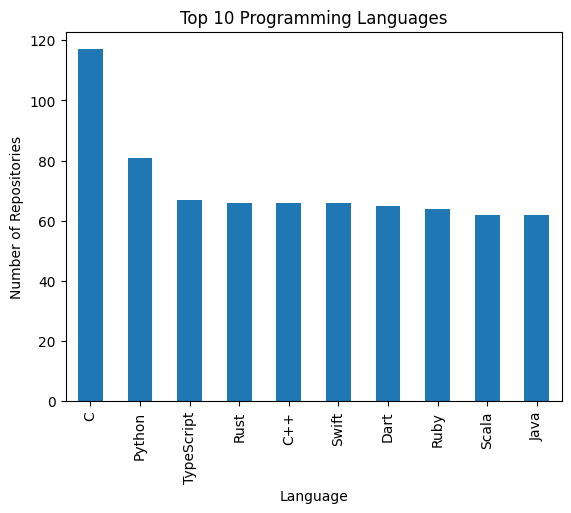

In [20]:

plt.figure()
top_languages.plot(kind="bar")
plt.title("Top 10 Programming Languages")
plt.xlabel("Language")
plt.ylabel("Number of Repositories")
plt.show()

In [21]:
timeframe_counts = df["timeframe"].value_counts()
print("\nRepositories per Timeframe:\n", timeframe_counts)


Repositories per Timeframe:
 timeframe
monthly    565
daily      515
weekly     507
Name: count, dtype: int64


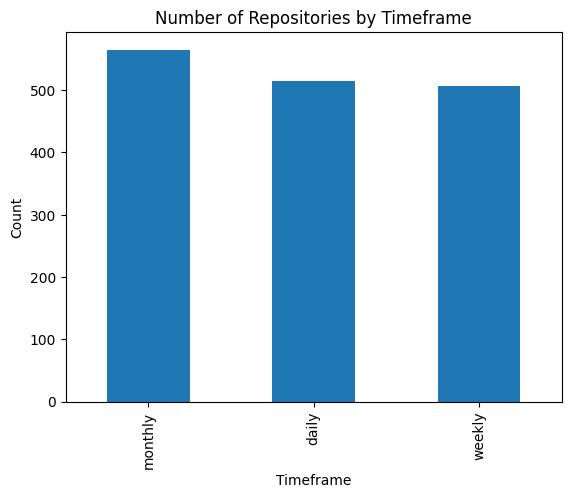

In [22]:
plt.figure()
timeframe_counts.plot(kind="bar")
plt.title("Number of Repositories by Timeframe")
plt.xlabel("Timeframe")
plt.ylabel("Count")
plt.show()

In [23]:
search_lang_counts = df["search_language"].value_counts()
print("Repositories by Search Language:\n", search_lang_counts)

Repositories by Search Language:
 search_language
swift               66
dart                65
rust                65
ruby                65
c++                 64
scala               62
java                61
perl                61
lua                 61
php                 61
kotlin              61
objective-c         60
c                   60
shell               57
c#                  57
python              57
typescript          55
html                55
vue                 54
overall             53
jupyter-notebook    52
r                   52
elixir              50
javascript          50
solidity            47
css                 44
go                  44
haskell             27
clojure             21
Name: count, dtype: int64


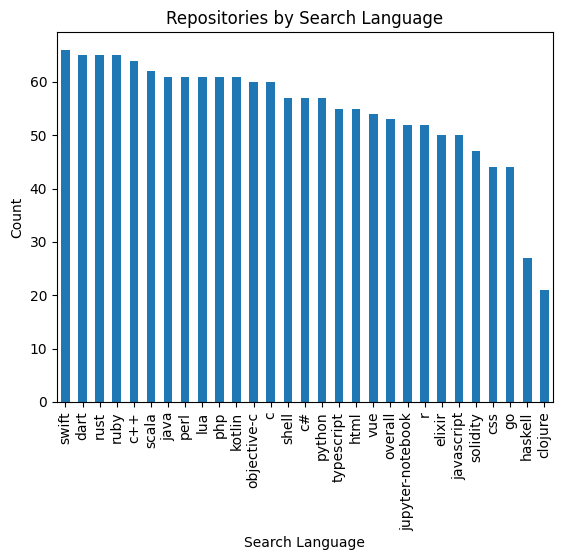

In [24]:
plt.figure()
search_lang_counts.plot(kind="bar")
plt.title("Repositories by Search Language")
plt.xlabel("Search Language")
plt.ylabel("Count")
plt.show()

In [25]:
avg_stars_search_lang = df.groupby("search_language")["stars"].mean()
print("\nAverage Stars by Search Language:\n", avg_stars_search_lang)


Average Stars by Search Language:
 search_language
c                   15825.533333
c#                  15902.210526
c++                 23630.656250
clojure             30831.523810
css                 15739.363636
dart                15832.538462
elixir               7430.660000
go                  22741.181818
haskell             15085.703704
html                12233.127273
java                19627.311475
javascript          38665.660000
jupyter-notebook    24133.692308
kotlin              16019.213115
lua                  8959.360656
objective-c          5188.966667
overall             29906.849057
perl                 3719.262295
php                 14555.655738
python              18008.649123
r                    2263.750000
ruby                17708.384615
rust                22317.707692
scala                8490.596774
shell               16823.087719
solidity             3179.425532
swift               11874.151515
typescript          40370.218182
vue                 1254

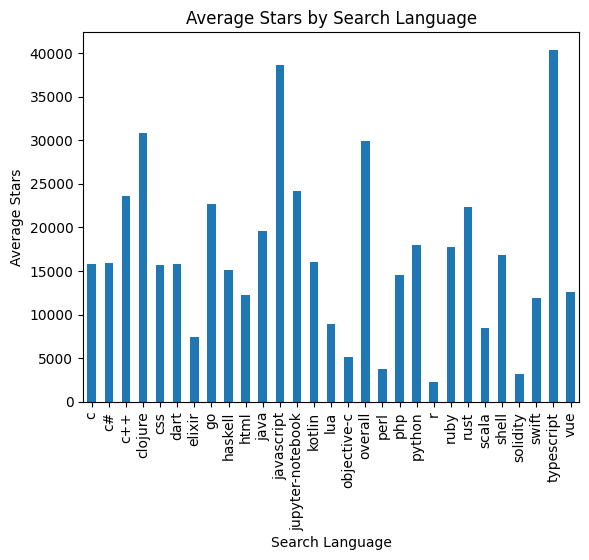

In [26]:
plt.figure()
avg_stars_search_lang.plot(kind="bar")
plt.title("Average Stars by Search Language")
plt.xlabel("Search Language")
plt.ylabel("Average Stars")
plt.show()


Average Stars by Search Language:
 search_language
c                   15825.533333
c#                  15902.210526
c++                 23630.656250
clojure             30831.523810
css                 15739.363636
dart                15832.538462
elixir               7430.660000
go                  22741.181818
haskell             15085.703704
html                12233.127273
java                19627.311475
javascript          38665.660000
jupyter-notebook    24133.692308
kotlin              16019.213115
lua                  8959.360656
objective-c          5188.966667
overall             29906.849057
perl                 3719.262295
php                 14555.655738
python              18008.649123
r                    2263.750000
ruby                17708.384615
rust                22317.707692
scala                8490.596774
shell               16823.087719
solidity             3179.425532
swift               11874.151515
typescript          40370.218182
vue                 1254

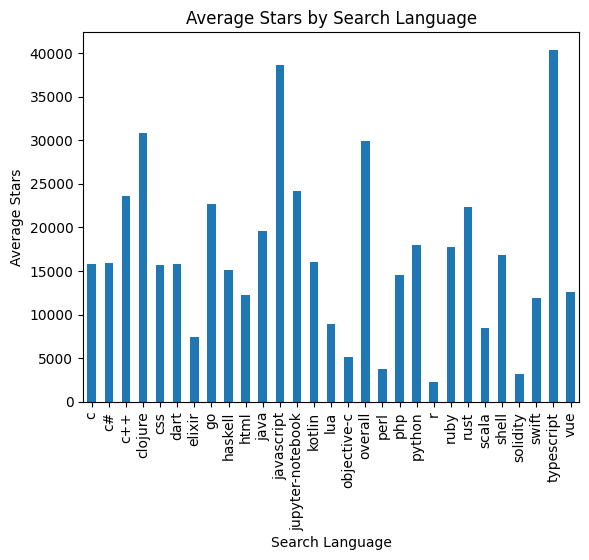

In [27]:
avg_stars_search_lang = df.groupby("search_language")["stars"].mean()
print("\nAverage Stars by Search Language:\n", avg_stars_search_lang)

plt.figure()
avg_stars_search_lang.plot(kind="bar")
plt.title("Average Stars by Search Language")
plt.xlabel("Search Language")
plt.ylabel("Average Stars")
plt.show()